## Import and Setup Data Set

In [9]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# import data
df = pd.read_csv(r"SouthGermanCredit/SouthGermanCredit.asc", header=0, delimiter=r"\s+")

# inspect import
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
# remap columns from German to English
englishCols = {
    "laufkont":"status",
    "laufzeit":"duration",
    "moral":"credit_history",
    "verw":"purpose",
    "hoehe":"amount",
    "sparkont":"savings",
    "beszeit":"employment_duration",
    "rate":"installment_rate",
    "famges":"personal_status_sex",
    "buerge":"other_debtors",
    "verm":"property",
    "wohnzeit":"present_residence",
    "verm ":"property",
    "alter":"age",
    "weitkred":"other_installment_plans",
    "wohn":"housing",
    "bishkred":"number_credits",
    "beruf":"job",
    "pers":"people_liable",
    "telef":"telephone",
    "gastarb":"foreign_worker",
    "kredit":"credit_risk"
}

# apply rename in place
df.rename(columns=englishCols, inplace=True)

# check column rename
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'verm', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

## Exploratory Data Analysis

In [4]:
# describe dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
status,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
savings,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
employment_duration,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
installment_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status_sex,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
other_debtors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0


Based on the summary statistics above, each column has 1,000 records and no missingness. There is also many different fields with categorical data and only a few fields that are continious. 

As an example of a categorical field is job. In this variable: 
1. unemployed/unskilled - non-resident
2. unskilled - resident
3. skilled employee/official
4. manager/self-empl./highly qualif. employee 

Other definitions for categorical variables could be seen in the SouthGermanCredit/codetable.txt file. 

Continious variables, like amount, is not binned. 

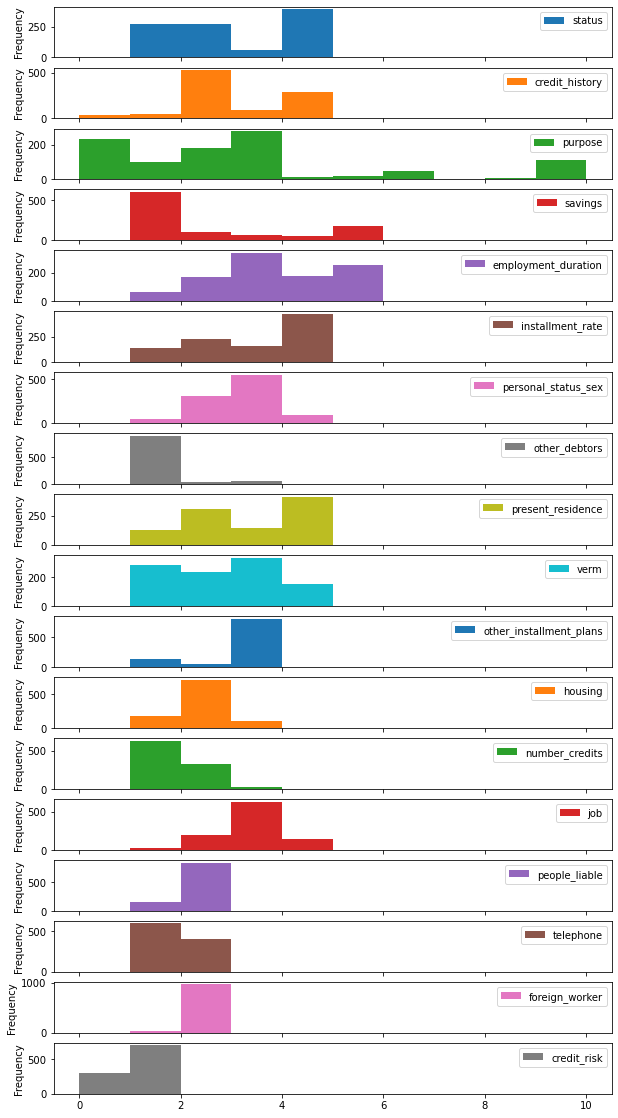

In [38]:
# get historgram of categorical data with low levels of cardinality
# for this example, we'll exclude amount, age, and duration
df.loc[:, ~df.columns.isin(['amount','age','duration'])].plot.hist(subplots=True, legend=True,figsize=(10, 20))
plt.show()

The histograms above show that nearly all of the variables have inbalanced classes. If one of these variables were a response variable in a supervised classification problem, techniques like SMOTE, oversampling, or undersampling would need to be employed. 

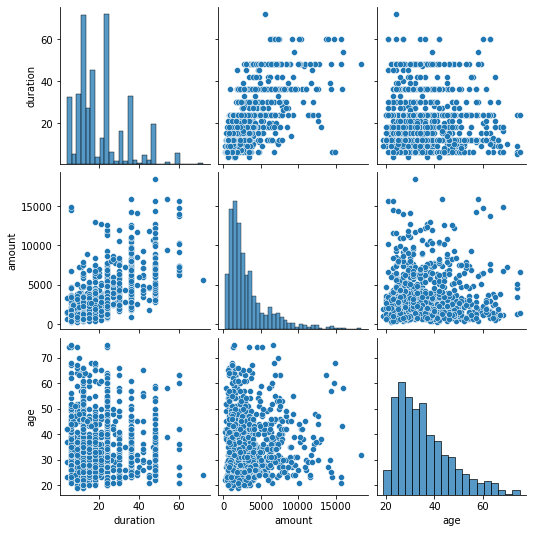

In [42]:
# pairplot to analyze interaction or trends between continious variables 
sns.pairplot(df[['duration','amount','age']])

Looking at the pairplot, there is a positive correlation between duration and amount, which, on the surface, makes sense. Often in lending, larger loan amounts have a longer term which benefits the borrower as the monthly payments will be lower, however, this poses a unique risk to a bank from both a default and interest risk rate perspective. 

There doesn't appear to be a strong relationshp between age-amount or age-duration. 